## Notas de aula de Álgebra Linear <br> Autor: Jonas Maziero
Link para os vídeos das aulas sobre este tópico: .

In [1]:
%run init.ipynb
from scipy.linalg import polar, lapack
import mpmath

# Espaços compostos
Para a descrição de sistemas constituídos por muitos graus de liberdade, precisaremos do conceito de espaços de Hilbert compostos. Para iniciar, consideremos dois espaços de Hilbert $\mathcal{H}_{a}$ e $\mathcal{H}_{b}$ com bases ortonormais respectivas $\{|a_{j}\rangle\}_{j=1}^{\dim \mathcal{H}_{a}}$ e $\{|b_{j}\rangle\}_{j=1}^{\dim \mathcal{H}_{b}}$. A composição desses dois espaços nos fornece um espaço de Hilbert "maior" denotado por
\begin{equation}
\mathcal{H}_{ab}=\mathcal{H}_{a}\otimes\mathcal{H}_{b}.
\end{equation}
Uma base para o espaço composto pode ser obtida através do produto tensorial (ou produto de Kronecker ou produto direto) dos vetores das bases individuais:
\begin{equation}
|c_{jk}\rangle:=|a_{j}\rangle\otimes|b_{k}\rangle,
\end{equation}
para $j=1,\cdots,\dim\mathcal{H}_{a}$ e $k=1,\cdots,\dim\mathcal{H}_{b}$. 

## Produto tensorial
O produto tensorial de duas matrizes $A\in\mathbb{C}^{m\mathrm{x}n}$ e $B\in\mathbb{C}^{p\mathrm{x}q}$ é uma matriz $mp\mathrm{x}nq$ definida como:
\begin{equation}
A\otimes B = \begin{bmatrix}A_{1,1} & A_{1,2} & \cdots & A_{1,d_{a}} \\ A_{2,1} & A_{2,2} & \cdots & A_{2,d_{a}} \\ \vdots & \vdots & \cdots & \vdots \\ A_{d_{a},1} & A_{d_{a},2} & \cdots & A_{d_{a},d_{a}} \end{bmatrix}\otimes B := \begin{bmatrix}A_{1,1}B & A_{1,2}B & \cdots & A_{1,d_{a}}B \\ A_{2,1}B & A_{2,2}B & \cdots & A_{2,d_{a}}B \\ \vdots & \vdots & \cdots & \vdots \\ A_{d_{a},1}B & A_{d_{a},2}B & \cdots & A_{d_{a},d_{a}}B \end{bmatrix}.
\end{equation}

__Exemplo:__ Consideremos 
\begin{align}
A\otimes B & = \begin{bmatrix} A_{1,1} & A_{1,2} \\ A_{2,1} & A_{2,2} \end{bmatrix} \otimes \begin{bmatrix} B_{1,1} & B_{1,2} \\ B_{2,1} & B_{2,2} \end{bmatrix} = \begin{bmatrix} A_{1,1}\begin{bmatrix} B_{1,1} & B_{1,2} \\ B_{2,1} & B_{2,2} \end{bmatrix} & A_{1,2}\begin{bmatrix} B_{1,1} & B_{1,2} \\ B_{2,1} & B_{2,2} \end{bmatrix} \\ A_{2,1}\begin{bmatrix} B_{1,1} & B_{1,2} \\ B_{2,1} & B_{2,2} \end{bmatrix} & A_{2,2}\begin{bmatrix} B_{1,1} & B_{1,2} \\ B_{2,1} & B_{2,2} \end{bmatrix} \end{bmatrix}  \\ 
& = \begin{bmatrix} A_{1,1}B_{1,1} & A_{1,1}B_{1,2} & A_{1,2}B_{1,1} & A_{1,2}B_{1,2} \\ A_{1,1}B_{2,1} & A_{1,1}B_{2,2} & A_{1,2}B_{2,1} & A_{1,2}B_{2,2}  \\ A_{2,1}B_{1,1} & A_{2,1}B_{1,2} & A_{2,2}B_{1,1} & A_{2,2}B_{1,2} \\ A_{2,1}B_{2,1} & A_{2,1}B_{2,2} & A_{2,2}B_{2,1} & A_{2,2}B_{2,2} \end{bmatrix}. 
\end{align}

__Exercício:__ Calcule o produto tensorial $\sigma_{x}\otimes\sigma_{y}=\begin{bmatrix}0&1\\1&0\end{bmatrix}\otimes\begin{bmatrix}0&-i\\i&0\end{bmatrix}$.

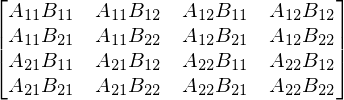

In [57]:
A11,A12,A21,A22,B11,B12,B21,B22 = symbols("A_11 A_12 A_21 A_22 B_11 B_12 B_21 B_22")
A = Matrix([[A11,A12],[A21,A22]]); B = Matrix([[B11,B12],[B21,B22]]); tp(A,B)

### Propriedade importante de produto tensorial
Vamos começar verificando que para quaisquer matrizes $A,B,C,D$, com dimensões apropriadas para que as multiplicações matriciais envolvidas possam ser realizadas, teremos $(A\otimes B)(C\otimes D)=(AC\otimes BD)$. Faremos a verificação explícita
\begin{align}
(A\otimes B)(C\otimes D) & = \begin{bmatrix}A_{1,1}B & A_{1,2}B & \cdots \\ A_{2,1}B & A_{2,2}B & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \begin{bmatrix}C_{1,1}D & C_{1,2}D & \cdots \\ C_{2,1}D & C_{2,2}D & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \\
& = \begin{bmatrix}(A_{1,1}BC_{1,1}D+A_{1,2}BC_{2,1}D+\cdots) & (A_{1,1}BC_{1,2}D+A_{1,2}BC_{2,2}D+\cdots)& \cdots \\ (A_{2,1}BC_{1,1}D+A_{2,2}BC_{2,1}D+\cdots) & (A_{2,1}BC_{1,2}D+A_{2,2}BC_{2,2}D+\cdots) & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \\
& = \begin{bmatrix}(A_{1,1}C_{1,1}+A_{1,2}C_{2,1}+\cdots)BD & (A_{1,1}C_{1,2}+A_{1,2}C_{2,2}+\cdots)BD & \cdots \\ (A_{2,1}C_{1,1}+A_{2,2}C_{2,1}+\cdots)BD & (A_{2,1}C_{1,2}+A_{2,2}C_{2,2}+\cdots)BD & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix} \\
& = \begin{bmatrix}(A_{1,1}C_{1,1}+A_{1,2}C_{2,1}+\cdots) & (A_{1,1}C_{1,2}+A_{1,2}C_{2,2}+\cdots) & \cdots \\ (A_{2,1}C_{1,1}+A_{2,2}C_{2,1}+\cdots) & (A_{2,1}C_{1,2}+A_{2,2}C_{2,2}+\cdots) & \cdots \\ \vdots & \vdots & \vdots\end{bmatrix}\otimes BD \\
& = AC\otimes BD.
\end{align}

__Exercício:__ Verifique que $(A\otimes B)^{\dagger}=A^{\dagger}\otimes B^{\dagger}$. <br>
Dica: Use a definição do adjunto e expanda os vetores usados no produto interno em uma base que é o produto tensorial de bases locais.

## Construíndo bases compostas a partir de bases lindividuais
Vemos que o produto interno de dois elemento da "base composta" $|c_{lm}\rangle=|a_{l}\rangle\otimes|b_{m}\rangle$ é dado por:
\begin{equation}
\langle c_{jk}|c_{lm}\rangle = (\langle a_{j}|\otimes\langle b_{k}|)(|a_{l}\rangle\otimes|b_{m}\rangle) = \langle a_{j}|a_{l}\rangle\otimes\langle b_{k}|b_{m}\rangle = \delta_{j,l}\otimes\delta_{k,m} = \delta_{j,l}\delta_{k,m}.
\end{equation}
Por conseguinte, como os elementos de $\{|a_{j}\rangle\otimes|b_{k}\rangle\}$ são ortogonais com relação aos dois índices, e por conseguinte:
\begin{equation}
d_{ab}\equiv\dim\mathcal{H}_{ab} = d_{a}d_{b}.
\end{equation}

##### Exemplo
Vamos considerar a base padrão para $\mathbb{C}^{2}$
\begin{equation}
|a_{1}\rangle=\begin{bmatrix}1\\0\end{bmatrix}\text{, }|a_{2}\rangle=\begin{bmatrix}0\\1\end{bmatrix}.
\end{equation}
Uma base para $\mathbb{C}^{4}=\mathbb{C}^{2}\otimes\mathbb{C}^{2}$ é obtida como segue:
\begin{align}
& |c_{11}\rangle=|a_{1}\rangle\otimes|a_{1}\rangle=\begin{bmatrix}1|a_{1}\rangle\\0|a_{1}\rangle\end{bmatrix}=\begin{bmatrix}1\\0\\0\\0\end{bmatrix}, \\
& |c_{12}\rangle=|a_{1}\rangle\otimes|a_{2}\rangle=\begin{bmatrix}1|a_{2}\rangle\\0|a_{2}\rangle\end{bmatrix}=\begin{bmatrix}0\\1\\0\\0\end{bmatrix}, \\
& |c_{21}\rangle=|a_{2}\rangle\otimes|a_{1}\rangle=\begin{bmatrix}0|a_{1}\rangle\\1|a_{1}\rangle\end{bmatrix}=\begin{bmatrix}0\\0\\1\\0\end{bmatrix}, \\
& |c_{22}\rangle=|a_{2}\rangle\otimes|a_{2}\rangle=\begin{bmatrix}0|a_{2}\rangle\\1|a_{2}\rangle\end{bmatrix}=\begin{bmatrix}0\\0\\0\\1\end{bmatrix}. \\
\end{align}

__Exercício:__ Uma base para $\mathbb{C}^{2\mathrm{x}2}$ é
\begin{equation}
A_{1}=\begin{bmatrix}1&0\\0&0\end{bmatrix}\text{, }A_{2}=\begin{bmatrix}0&1\\0&0\end{bmatrix}\text{, }A_{3}=\begin{bmatrix}0&0\\1&0\end{bmatrix}\text{, }A_{4}=\begin{bmatrix}0&0\\0&1\end{bmatrix}.
\end{equation}
Obtenha uma base para $\mathbb{C}^{4\mathrm{x}4}$.

__Exercício:__ Verifique que $|a\rangle\otimes\langle b| = |a\rangle\langle b|$ para quaisquer dois vetores $|a\rangle,|b\rangle\in\mathbb{C}^{n}$. <br>
Dica: Faça os dois produtos e verifique a igualdade.

__Exercício:__ Verifique que $Tr(A\otimes B)=Tr(A)Tr(B)$.

__Exercício:__ Considere $\mathcal{H}_{a}=\mathbb{C}^{d_{a}\mathrm{x}d_{a}}$ e $\mathcal{H}_{b}=\mathbb{C}^{d_{b}\mathrm{x}d_{b}}$ e bases ortonormais, sob o produto interno de Hilbert-Schmidt, $\{A_{j}\}_{j=1}^{d_{a}^{2}}\in\mathcal{H}_{a}$ e $\{B_{k}\}_{k=1}^{d_{b}^{2}}\in\mathcal{H}_{b}$. Defina uma base de $ \mathcal{H}_{ab}=\mathcal{H}_{a}\otimes\mathcal{H}_{b}$ como $\{C_{jk}=A_{j}\otimes B_{k}\}$, com $j=1,\cdots,\dim\mathcal{H}_{a}$ e $k=1,\cdots,\dim\mathcal{H}_{b}$, e verifique que 
\begin{equation}
\langle C_{j,k}|C_{l,m}\rangle=\delta_{j,l}\delta_{k,m},
\end{equation}
e portanto que nesse caso também temos $\dim\mathcal{H}_{ab}=(\dim\mathcal{H}_{a})(\dim\mathcal{H}_{b})$.

# Representação produto externo
Considere um operador linear $A:\mathbb{C}^{n}\rightarrow\mathbb{C}^{n}$ e uma base ortonormal $|\beta_{j}\rangle\in\mathbb{C}^{n}$. Podemos escrever a representação produto externo de $A$ da seguinte forma:
\begin{equation}
A = \mathbb{I}_{\mathbb{C}^{n}}A\mathbb{I}_{\mathbb{C}^{n}} = \sum_{j=1}^{n}|\beta_{j}\rangle\langle\beta_{j}|A\sum_{k=1}^{n}|\beta_{k}\rangle\langle\beta_{k}| = \sum_{j,k=1}^{n}\langle\beta_{j}|A|\beta_{k}\rangle|\beta_{j}\rangle\langle\beta_{k}|.
\end{equation}
_OBS:_ Cada termo do tipo $|\beta_{j}\rangle\langle\beta_{k}|$ é chamado de __produto externo__, e é uma matriz $n\mathrm{x}n$. <br>
Note que o projetor em $\mathbb{C}^{n}$ também é um produto externo, mas nesse caso temos um único vetor envolvido.

__Exercício:__ Para o operador de inversão definido por $A|e_{1}\rangle=|e_{2}\rangle$ e $A|e_{2}\rangle=|e_{1}\rangle$, escreva sua representação produto externo (primeiramente com todos os termos, sejam eles nulos ou não).

Consideremos agora o espaço composto $\mathbb{C}^{n}\otimes\mathbb{C}^{m}$, um operador linear $C$ neste espaço e duas bases ortonormais dos espaços individuais $\{|\alpha_{j}\rangle\}_{j=1}^{n}$ e $\{|\beta_{k}\rangle\}_{k=1}^{m}$. Analogamente ao que fizemos acima, podemos escrever a seguinte representação produto externo para $C$ (__exercício__):
\begin{align}
C & = (\mathbb{I}_{\mathbb{C}^{n}}\otimes\mathbb{I}_{\mathbb{C}^{m}})C(\mathbb{I}_{\mathbb{C}^{n}}\otimes\mathbb{I}_{\mathbb{C}^{m}}) = \sum_{j,p=1}^{n}\sum_{k,q=1}^{m}(\langle\alpha_{j}|\otimes\langle\beta_{k}|)C(|\alpha_{p}\rangle\otimes|\beta_{q}\rangle)|\alpha_{j}\rangle\langle\alpha_{p}|\otimes|\beta_{k}\rangle\langle\beta_{q}| \\
& =: \sum_{j,p=1}^{n}\sum_{k,q=1}^{m}C_{jk,pq}(|\alpha_{j}\rangle\otimes|\beta_{k}\rangle)(\langle\alpha_{p}|\otimes\langle\beta_{q}|).
\end{align}

__Exercício:__ Obtenha a representação produto externo de $\sigma_{z}\otimes\sigma_{z}$, com $\sigma_{z}\doteq\begin{bmatrix}1&0\\0&-1\end{bmatrix}$ quando representado na base padrão de $\mathbb{C}^{2}$: $\left\{|e_{1}\rangle=\begin{bmatrix}1\\0\end{bmatrix},|e_{2}\rangle=\begin{bmatrix}0\\1\end{bmatrix}\right\}$.

# Traço parcial
Vimos que a função traço de uma operador linear $B:\mathcal{H}_{b}\rightarrow\mathcal{H}_{b}$ podia ser escrita como $Tr(B)=\sum_{j=1}^{d_{b}}\langle\beta_{j}|B|\beta_{j}\rangle$ com $\{|\beta_{j}\rangle\}_{j=1}^{d_{b}}$ sendo uma base qualquer de $\mathcal{H}_{b}$. Consideremos um operador linear atuando no espaço composto: $C:\mathcal{H}_{a}\otimes\mathcal{H}_{b}\rightarrow\mathcal{H}_{a}\otimes\mathcal{H}_{b}$. A função traço parcial $Tr_{b}$ é uma função que leva operador lineares definidos em $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$ em operadores lineares definidos em $\mathcal{H}_{a}$ e é definida por [arXiv:1601.07458]:
\begin{equation}
Tr_{\mathcal{H}_{b}}(C) := \sum_{l=1}^{d_{b}}(\mathbb{I}_{a}\otimes\langle\beta_{l}|)C(\mathbb{I}_{a}\otimes|\beta_{l}\rangle).
\end{equation}
Analogamente, o traço parcial sobre $\mathcal{H}_{a}$ é definido como $Tr_{\mathcal{H}_{a}}(C) := \sum_{l=1}^{d_{a}}(\langle\alpha_{l}|\otimes\mathbb{I}_{b})C(|\alpha_{l}\rangle\otimes\mathbb{I}_{b})$.

Se aplicamos essa definição no operador $C$,
\begin{align}
\mathrm{Tr}_{\mathcal{H}_{b}}(C) & = \sum_{l=1}^{m}\mathbb{I}_{\mathcal{H}_{b}}\otimes\langle\beta_{l}|\left(\sum_{j,p=1}^{n}\sum_{k,q=1}^{m}C_{jk,pq}|\alpha_{j}\rangle\langle\alpha_{p}|\otimes |\beta_{k}\rangle\langle\beta_{q}|\right)\mathbb{I}_{\mathcal{H}_{b}}\otimes|\beta_{l}\rangle \\
& = \sum_{l=1}^{m}\sum_{j,p=1}^{n}\sum_{k,q=1}^{m}C_{jk,pq}(\mathbb{I}_{\mathcal{H}_{b}}\otimes\langle\beta_{l}|)(|\alpha_{j}\rangle\otimes|\beta_{k}\rangle)(\langle\alpha_{p}|\otimes\langle\beta_{q}|)(\mathbb{I}_{\mathcal{H}_{b}}\otimes|\beta_{l}\rangle) \\
& = \sum_{l=1}^{m}\sum_{j,p=1}^{n}\sum_{k,q=1}^{m}C_{jk,pq}(\mathbb{I}_{\mathcal{H}_{b}}|\alpha_{j}\rangle\otimes\langle\beta_{l}|\beta_{k}\rangle)(\langle\alpha_{p}|\mathbb{I}_{\mathcal{H}_{b}}\otimes\langle\beta_{q}|\beta_{l}\rangle) \\
& = \sum_{j,p=1}^{n}\left(\sum_{l=1}^{m}C_{jl,pl}\right)|\alpha_{j}\rangle\langle\alpha_{p}| \\
& =: \sum_{j,p=1}^{n}A_{j,p}|\alpha_{j}\rangle\langle\alpha_{p}|.
\end{align}
Ou seja, $\mathrm{Tr}_{\mathcal{H}_{b}}$ leva operadores definidos em $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$ em operadores de $\mathcal{H}_{a}$.

__Exercício:__ Usando um procedimento análogo, obtenha $Tr_{\mathcal{H}_{a}}(C)$.

### Exemplo: Entropia das partes maior que a entropia do todo
Seja $\{|e_{1}\rangle,|e_{2}\rangle\}\in\mathbb{C}^{2}$ uma base ortonormal. Consideremos o projetor no vetor $|\Psi\rangle=2^{-1/2}\left(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle\right)$ (chamado de estado singleto):
\begin{align}
P_{\Psi} &=|\Psi\rangle\langle\Psi| = |\Psi\rangle|\Psi\rangle^{\dagger}\\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)^{\dagger} \\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)((|e_{1}\rangle\otimes|e_{2}\rangle)^{\dagger}-(|e_{2}\rangle\otimes|e_{1}\rangle)^{\dagger}) \\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)((|e_{1}\rangle)^{\dagger}\otimes(|e_{2}\rangle)^{\dagger}-(|e_{2}\rangle)^{\dagger}\otimes(|e_{1}\rangle)^{\dagger}) \\
& = 2^{-1}(|e_{1}\rangle\otimes|e_{2}\rangle-|e_{2}\rangle\otimes|e_{1}\rangle)(\langle e_{1}|\otimes\langle e_{2}|-\langle e_{2}|\otimes\langle e_{1}|) \\
& = 2^{-1}(|e_{1}\rangle\langle e_{1}|\otimes|e_{2}\rangle\langle e_{2}| - |e_{1}\rangle\langle e_{2}|\otimes|e_{2}\rangle\langle e_{1}|  - |e_{2}\rangle\langle e_{1}|\otimes|e_{1}\rangle\langle e_{2}| + |e_{2}\rangle\langle e_{2}|\otimes|e_{1}\rangle\langle e_{1}|).
\end{align}

Agora tomamos o traço parcial sobre o espaço da "direita=d":
\begin{align}
\mathrm{Tr}_{d}(P_{\Psi}) & = \sum_{j=1}^{2}(\mathbb{I}_{e}\otimes\langle e_{j}|)P_{\Psi}(\mathbb{I}_{e}\otimes|e_{j}\rangle) \\
& = (\mathbb{I}_{e}\otimes\langle e_{1}|)P_{\Psi}(\mathbb{I}_{e}\otimes|e_{1}\rangle) + (\mathbb{I}_{e}\otimes\langle e_{2}|)P_{\Psi}(\mathbb{I}_{e}\otimes|e_{2}\rangle) \\
& \vdots \textbf{exercício}\\
& = 2^{-1}(|e_{2}\rangle\langle e_{2}|+|e_{1}\rangle\langle e_{1}|) \\
& = 2^{-1}\mathbb{I}_{\mathbb{C}^{2}}.
\end{align}

Como vimos ao discutir a entropia de von Neumann, teremos que $S_{vn}(P_{\Psi})=0$ enquanto que $S_{vn}(\mathrm{Tr}_{d}(P_{\Psi}))=S_{vn}(2^{-1}\mathbb{I}_{\mathbb{C}^{2}})=\log_{2}(2)=1$.

__Exercício:__ Calcule o traço parcial aplicado ao espaço da "esquerda=e" do projetor no vetor $|\Phi\rangle=(|e_{1}\rangle\otimes|e_{1}\rangle+|e_{2}\rangle\otimes|e_{2}\rangle)/\sqrt{2}$ (um dos estados do tripleto). Calcule também $S_{vn}(P_{\Phi})$ e $S_{vn}(\mathrm{Tr}_{d}(P_{\Phi}))$.

In [49]:
def ptrace(da, db, C, ssys):
    if ssys == 'a':
        ptr = zeros(db,db)
        for j in range(0, db):
            for k in range(0, db):
                for l in range(0, da):
                    ptr[j,k] += C[l*db+j,l*db+k]
    elif ssys == 'b':
        ptr = zeros(da,da)
        for j in range(0, da):
            for k in range(0, da):
                for l in range(0, db):
                    ptr[j,k] += C[j*db+l,k*db+l]
    return ptr

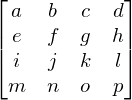

In [58]:
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p = symbols('a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p')
A = Matrix([[a,b,c,d],[e,f,g,h],[i,j,k,l],[m,n,o,p]])
A

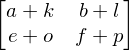

In [59]:
ptrace(2, 2, A, 'a')

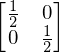

In [62]:
Psi = Matrix([[0],[1/sqrt(2)],[-1/sqrt(2)],[0]])
Psi
P_Psi = proj(Psi)
P_Psi
ptrace(2, 2, P_Psi, 'a')

---
# Teorema (decomposição polar)
Para uma matriz qualquer $A$, podemos escrever
\begin{equation}
A=UJ=KV,
\end{equation}
com $U$ e $V$ sendo matrizes unitárias e $J=\sqrt{A^{\dagger}A}$ e $K=\sqrt{AA^{\dagger}}$ são matrizes positivas. Além disso, se existir a inversa de $A$, então $U=AJ^{-1}$.

## Prova
Vamos provar esse resultado mostrando que a ação de $A$ e de $UJ$ é a mesma, para a definição conveniente de $U$.<br> Como $J$ é positiva, é Hermitiana e assim podemos escrever a decomposição espectral $J=\sum_{j}\lambda_{j}|j\rangle\langle j|$. Vamos definir a ação de $A$ nos autovetores de $J$ como segue:
\begin{equation}
A|j\rangle=:|\psi_{j}\rangle.
\end{equation}
Agora, de $A^{\dagger}A=(UJ)^{\dagger}(UJ)=J^{\dagger}U^{\dagger}UJ=J^{2}$ vem que
\begin{align}
(|\psi_{j}\rangle,|\psi_{k}\rangle) & = (A|j\rangle,A|k\rangle) = (A^{\dagger}A|j\rangle,|k\rangle) = (J^{2}|j\rangle,|k\rangle) = (\lambda_{j}^{2}|j\rangle,|k\rangle) = \lambda_{j}^{2}(|j\rangle,|k\rangle) \\
& = \lambda_{j}^{2}\delta_{j,k}.
\end{align}
Então, para $\lambda_{j}>0$ podemos definir o seguinte conjunto ortonormal de vetores:
\begin{equation}
|e_{j}\rangle := \frac{|\psi_{j}\rangle}{||\psi_{j}||} = \frac{|\psi_{j}\rangle}{\sqrt{\langle\psi_{j}|\psi_{j}\rangle}}=\frac{|\psi_{j}\rangle}{\lambda_{j}}.
\end{equation}
Podemos aplicar o procedimento de Gram-Schmidt para completar a base ortonormal $|e_{j}\rangle$ usando vetores LI no subespaço gerado pelo autovetores de $J$ correspondentes a $\lambda_{j}=0$. Tendo essa base, definimos o operador unitário
\begin{equation}
U:=\sum_{j}|e_{j}\rangle\langle j|.
\end{equation}

Agora, para a ação dos operadores, teremos
\begin{align}
& \lambda_{j}>0: \\
& UJ|j\rangle = \sum_{k}|e_{k}\rangle\langle k|\lambda_{j}|j\rangle = \lambda_{j}\sum_{k}|e_{k}\rangle\langle k|j\rangle = \lambda_{j}|e_{j}\rangle = |\psi_{j}\rangle. \\
& \lambda_{j}=0: \\
& UJ|j\rangle = U\lambda_{j}|j\rangle = U0|j\rangle  = |\oslash\rangle = |\psi_{j}\rangle, \\
\end{align}
pois $\langle\psi_{j}|\psi_{j}\rangle=\lambda_{j}^{2}=0\Rightarrow|\psi_{j}\rangle=|\oslash\rangle$. 

__Exercício:__ Prove a decomposição polar direita $A=KV$.

### Forma de $U$ quando $\det(A)\ne 0$
Se $\det(A)\ne 0$ existe $A^{-1}$ e isso implica que existe $J^{-1}$:
\begin{equation}
A^{-1}A = (UJ)^{-1}(UJ)=J^{-1}U^{-1}UJ=J^{-1}\mathbb{I}J = J^{-1}J=\mathbb{I}.
\end{equation}
Agora, de $A=UJ$ temos $AJ^{-1}=UJJ^{-1}$ e
\begin{equation}
U=AJ^{-1}.
\end{equation}

Concluimos assim a prova do teorema.

In [85]:
# Por enquanto não consegui a implementação simbólica dessa função
A = np.array([[2,3,5],[5,7,11],[13,17,19]])
U, J = polar(A, 'left')
print('U=',str(U))
print('J=',str(J))
b = lapack.zheevd(J)
print('b=',str(b[0]))

U= [[-0.7942532   0.4885547   0.36121484]
 [ 0.13752449 -0.43452234  0.89009963]
 [ 0.59181827  0.75664037  0.27793252]]
J= [[ 1.6832319   3.42198013  4.84322025]
 [ 3.42198013  7.43706205 11.31283166]
 [ 4.84322025 11.31283166 25.83724168]]
b= [ 0.07274768  2.55077732 32.33401062]


# Teorema (decomposição em valores singulares)
Para qualquer matriz $A$, existem matrizes unitárias $U$ e $W$ e uma matriz  positiva $D$ diagonal na base padrão $\{|c_{j}\rangle\}$ tais que
\begin{equation}
A = UDW.
\end{equation}

## Prova
Pela decomposição polar, temos que $A=SJ$ com $J=\sqrt{A^{\dagger}A}$ e $S^{\dagger}=S^{-1}$. Agora, usamos uma matriz unitária $W$ que leva os autovetores de $J=\sum_{j}\lambda_{j}|j\rangle\langle j|$ em vetores da base padrão $\{|c_{j}\rangle\}$, i.e., $W=\sum_{k}|c_{k}\rangle\langle k|\Rightarrow W|j\rangle=|c_{j}\rangle$ e
\begin{equation}
D:=WJW^{\dagger}=\sum_{j}\lambda_{j}W|j\rangle\langle j|W^{\dagger}=:\sum_{j}\lambda_{j}|c_{j}\rangle\langle c_{j}|.
\end{equation}
Assim $W^{\dagger}DW=W^{\dagger}WJW^{\dagger}W=J$ e
\begin{equation}
A=SJ=SW^{\dagger}DW=:UDW,
\end{equation}
completando assim a prova do teorema.

In [86]:
A = Matrix([[2,3,5],[5,7,11],[13,17,19]])
U, D, W = mpmath.svd(A)
print('U = ',U)
print('D = ',D)
print('W = ',W)

U =  Matrix([[-0.187471869728401, 0.438572867666425, 0.878924420987030], [-0.427589905246112, 0.769125066412659, -0.474987900000982], [-0.884319609073642, -0.464866079599888, 0.0433400166736405]])
D =  [  32.3340106207884]
[  2.55077732276222]
[0.0727476764263973]
W =  [-0.433260455931128  -0.574904812093077   -0.694096415751137]
[-0.517680612736692  -0.471671625184182    0.713815565249649]
[-0.737761587860817   0.668588315055189  -0.0932604120125419]


# Teorema (decomposição de Schmidt)
Consideremos um vetor qualquer de $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$:
\begin{equation}
|\Psi\rangle = \sum_{j=1}^{\dim\mathcal{H}_{a}}\sum_{k=1}^{\dim\mathcal{H}_{b}}c_{j,k}|\alpha_{j}\rangle\otimes|\beta_{k}\rangle,
\end{equation}
decomposto em uma base composta ortonormal. Existem bases ortonormais dos espaços individuais tais que
\begin{equation}
|\Psi\rangle = \sum_{j=1}^{\min(\dim\mathcal{H}_{a},\dim\mathcal{H}_{b})}d_{j}|\tilde{\alpha}_{j}\rangle\otimes|\tilde{\beta}_{j}\rangle,
\end{equation}
em que $d_{j}$ são os chamados coeficientes de Schmidt.

## Prova
Usamos a decomposição em valores singulares para escrever a matriz de coeficientes $C=(c_{j,k})$ como segue:
\begin{align}
c_{j,k}&=(UDV)_{j,k}=\sum_{l}(UD)_{j,l}V_{l,k}=\sum_{l,m}U_{j,m}D_{m,l}V_{l,k} \\
&=:\sum_{l,m}U_{j,m}d_{l}\delta_{l,m}V_{l,k}=\sum_{l}U_{j,l}d_{l}V_{l,k}.
\end{align}
Assim
\begin{align}
|\Psi\rangle &= \sum_{j,k}\sum_{l}U_{j,l}d_{l}V_{l,k}|\alpha_{j}\rangle\otimes|\beta_{k}\rangle = \sum_{l}d_{l}\sum_{j}U_{j,l}|\alpha_{j}\rangle\otimes\sum_{k}V_{l,k}|\beta_{k}\rangle \\
& =: \sum_{l}d_{l}|\tilde{\alpha}_{l}\rangle\otimes|\tilde{\beta}_{l}\rangle.
\end{align} 
Vamos verificar a ortonormalidade das bases que definimos. Teremos
\begin{align}
\langle\tilde{\alpha}_{j}|\tilde{\alpha}_{k}\rangle & = |\tilde{\alpha}_{j}\rangle^{\dagger}|\tilde{\alpha}_{k}\rangle  = \sum_{p}U_{p,j}^{*}|\alpha_{p}\rangle^{\dagger}\sum_{q}U_{q,k}|\alpha_{q}\rangle \\
& = \sum_{p,q}U_{p,j}^{*}U_{q,k}\langle\alpha_{p}|\alpha_{q}\rangle = \sum_{p,q}U_{p,j}^{*}U_{q,k}\delta_{p,q} = \sum_{p}(U^{\dagger})_{j,p}U_{p,k} \\
& = (U^{\dagger}U)_{j,k}=\delta_{j,k}.
\end{align}
__Exercício:__ Verifique que $\{|\tilde{\beta}_{k}\rangle\}$ é uma base ortonormal. <br>
Com isso, completamos a prova desse teorema.

## Obtendo a decomposição de Schmidt
Para $|\Psi\rangle = \sum_{j}d_{j}|\tilde{\alpha}_{j}\rangle\otimes|\tilde{\beta}_{j}\rangle$, teremos (__exercício__):
\begin{equation}
P_{\Psi}=\sum_{j,k}d_{j}d_{k}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\otimes|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{k}|.
\end{equation}
Tomando o traço parcial sobre o sub-sistema da direita teremos
\begin{align}
E&:=Tr_{d}(P_{\Psi})=\sum_{j,k}d_{j}d_{k}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\otimes Tr(|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{k}|) \\
&=\sum_{j,k}d_{j}d_{k}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\otimes \langle\tilde{\beta}_{k}|\tilde{\beta}_{j}\rangle =\sum_{j,k}d_{j}d_{k}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{k}|\otimes\delta_{k,j}\\
&=\sum_{j}d_{j}^{2}|\tilde{\alpha}_{j}\rangle\langle\tilde{\alpha}_{j}|.
\end{align}

__Exercício:__ Verifique que $D:=Tr_{e}(P_{\Psi})=\sum_{j}d_{j}^{2}|\tilde{\beta}_{j}\rangle\langle\tilde{\beta}_{j}|$.

Com isso, teremos o seguinte _algoritmo_ para calcular a decomposição de Schmidt de um vetor $|\Psi\rangle$ qualquer de um espaço composto $\mathcal{H}_{a}\otimes\mathcal{H}_{b}$:
1. Calcule o projetor $|\Psi\rangle\langle\Psi|$.
2. Obtenha as decomposições espectrais de $E:=Tr_{e}(P_{\Psi})$ e de $D:=Tr_{d}(P_{\Psi})$. 
3. Os coeficientes de Schmidt são as raízes quadradas dos autovalores desses operadores (que possuem o mesmo espectro). As bases $\{|\tilde{\alpha}_{j}\rangle\}$ e $\{|\tilde{\beta}_{j}\rangle\}$ são as bases de autovetores de $E$ e de $D$, respectivamente.

_OBS:_ Se as dimensões dos espaços forem diferentes, a soma vai até a menor dimensão, e o outro operador "local" deve necessariamente ter autovalores nulos (com degenerescência igual ou maior que a diferença entre as dimensões).

### Implicação importante
Note que $S_{vn}(|\Psi\rangle\langle\Psi|)=0$ e que $S_{vn}(E)=S_{vn}(D)=-\sum_{j}d_{j}^{2}\log_{2}(d_{j}^{2})$. Então a única maneira da entropia individual ser nula é se existe um único coeficiente de Schmidt não nulo (e por conseguinte igual a um). Nesse caso teríamos $|\Psi\rangle=|\tilde{\alpha}_{k}\rangle\otimes|\tilde{\beta}_{k}\rangle$.

In [128]:
def schmidt_decomp(da,db,Psi):
    scoeff = [] # lista para os coeficientes de Schmidt
    base_a = [] # lista para os autovetores de E
    base_b = [] # lista para os autovetores de D
    P_Psi = proj(Psi)
    A = ptrace(da, db, P_Psi, 'b')
    eig_a = A.eigenvects()
    B = ptrace(da, db, P_Psi, 'b')
    eig_b = B.eigenvects()
    ne = 0
    j = 0
    while ne < da:
        mult = eig_a[j][1]
        ne += mult
        for k in range(0,mult):
            scoeff.append(sqrt(eig_a[j][0]))
            base_a.append(eig_a[j][2][k]/norm(eig_a[j][2][k]))
        j += 1
    ne = 0
    j = 0
    while ne < db:
        mult = eig_b[j][1]
        ne += mult
        for k in range(0,mult):
            base_b.append(eig_b[j][2][k]/norm(eig_b[j][2][k]))
        j += 1
    return scoeff, base_a, base_b

scoeff, base_a, base_b


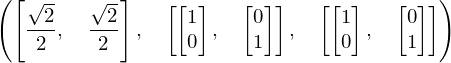

In [140]:
Psi = Matrix([[1/sqrt(2)],[0],[0],[1/sqrt(2)]])
scoeff, base_a, base_b = schmidt_decomp(2,2,Psi)
print('scoeff, base_a, base_b')
scoeff, base_a, base_b

---
# Exercícios

1. dddd

1. dddd